In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [2]:
base = VGG16(
    weights="vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", #Loads pre-trained weights from your local file.
    include_top=False, #Does not include the original fully-connected layers, only convolution layers.
    input_shape=(224,224,3)
)

In [3]:
#Freezes all layers of VGG16 so their weights do not update during training.
for layer in base.layers:
    layer.trainable = False

In [4]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
selected_classes = ['butterfly', 'cup']

train_data = train_gen.flow_from_directory(
    "caltech-101-img", target_size=(224,224),
    batch_size=32, subset='training', classes=selected_classes
)

val_data = train_gen.flow_from_directory(
    "caltech-101-img", target_size=(224,224),
    batch_size=32, subset='validation', classes=selected_classes
)

Found 119 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [8]:
# ---- Add Classifier on top of base model ----
model = Sequential([
    base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_data.num_classes, activation='softmax')
])


In [9]:
# ---- Compile (train only new layers) ----
model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
# ---- Train ----
model.fit(train_data, validation_data=val_data, epochs=5)

c:\Users\user\anaconda3\envs\tf\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5271 - loss: 2.3094 - val_accuracy: 0.7586 - val_loss: 0.3453
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8258 - loss: 0.8115 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9195 - loss: 0.2579 - val_accuracy: 0.9655 - val_loss: 0.0259
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9693 - loss: 0.0719 - val_accuracy: 0.9655 - val_loss: 0.1024
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0159


In [11]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0159
Validation Loss: 0.0159
Validation Accuracy: 1.0000


In [12]:
# Get a batch of validation images
images, labels = next(val_data)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


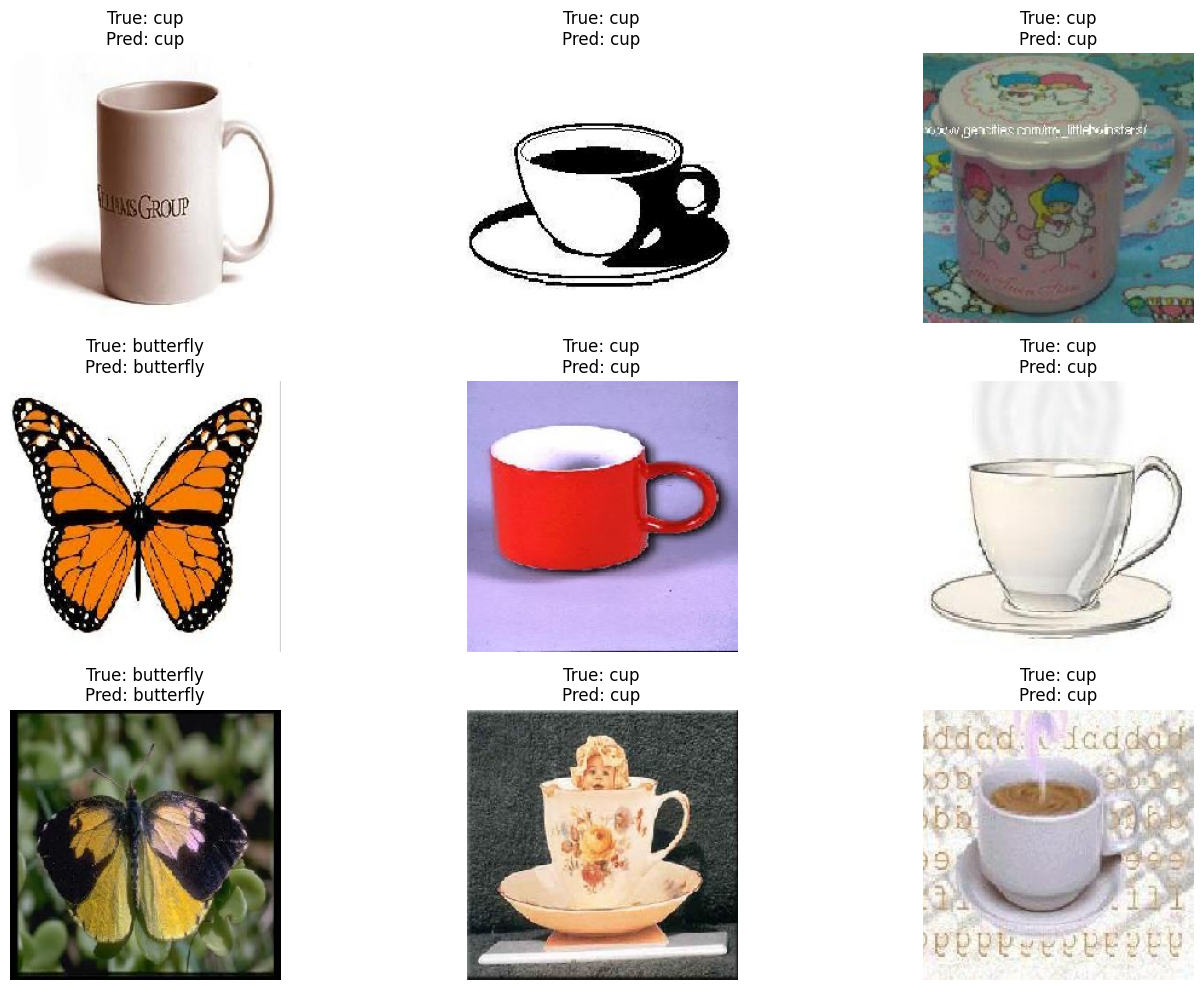


Batch Accuracy: 29/29 = 100.00%


In [13]:
# Display some samples with predictions
plt.figure(figsize=(15, 10))
for i in range(min(9, len(images))):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {selected_classes[true_classes[i]]}\nPred: {selected_classes[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print accuracy for this batch
correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")